In [244]:
import re
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import f1_score as f1
from sklearn.metrics import roc_auc_score, roc_curve
import missingno as msno
from sklearn.model_selection import train_test_split

In [245]:
df = pd.read_excel('sample_data/Data_sent06.xls')

In [246]:
df.head(10)


,age,married,plan_married,childrens_fact,important_cash,important_rest,important_children,important_educ,important_intim,chilpdren_plan,ideal_family,children_plan2,target,plan_living,plan_cash,plan_climat,plan_economy,plan_politic,plan_support_gov,education,occupation,income,living_conditions,religion
0,35-39,замужем,NaN,2.0,1.0,4.0,2.0,3.0,4.0,6,NaN,NaN,NaN,станут лучше,трудно сказать,"останутся прежними, вполне приемлемыми",станет лучше,станет лучше,станет лучше,среднее,3.0,2.0,квартира,да
1,35-39,замужем,NaN,1.0,2.0,5.0,4.0,1.0,3.0,6,NaN,NaN,NaN,"останутся прежними, неудовлетворительными",станет лучше,станут лучше,трудно сказать,трудно сказать,станет лучше,высш_незак_высш,6.0,4.0,квартира,нет
2,35-39,замужем,NaN,1.0,2.0,5.0,1.0,3.0,4.0,6,NaN,NaN,NaN,станут лучше,"останется прежним, вполне приемлемым",трудно сказать,станет лучше,станет лучше,станет лучше,среднее,2.0,4.0,квартира,да
3,35-39,замужем,NaN,1.0,3.0,5.0,4.0,1.0,2.0,6,NaN,NaN,NaN,"останутся прежними, неудовлетворительными",станет лучше,станут лучше,станет лучше,трудно сказать,"останется прежней, неудовлетворительной",среднее,3.0,4.0,квартира,да
4,30-34,замужем,NaN,2.0,1.0,1.0,1.0,1.0,1.0,3,6.0,3.0,да,станут лучше,"останется прежним, вполне приемлемым","останутся прежними, вполне приемлемыми",трудно сказать,трудно сказать,"останется прежней, неудовлетворительной",высш_незак_высш,14.0,4.0,квартира,нет
5,25-29,замужем,NaN,1.0,2.0,3.0,4.0,1.0,5.0,2,2.0,5.0,да,"останутся прежними, неудовлетворительными","останется прежним, неудовлетворительным","останутся прежними, вполне приемлемыми",станет хуже,трудно сказать,трудно сказать,среднее,3.0,3.0,комната,нет
6,25-29,замужем,NaN,1.0,3.0,5.0,4.0,2.0,1.0,2,3.0,3.0,да,станут лучше,станет лучше,станут лучше,"останется прежней, вполне приемлемой","останется прежней, вполне приемлемой",станет лучше,высш_незак_высш,6.0,4.0,квартира,нет
7,20-24,замужем,NaN,1.0,2.0,3.0,4.0,1.0,5.0,3,3.0,3.0,да,станут лучше,станет лучше,станут лучше,трудно сказать,трудно сказать,станет лучше,среднее,8.0,3.0,квартира,да
8,25-29,замужем,NaN,0.0,4.0,2.0,5.0,1.0,3.0,3,3.0,3.0,да,трудно сказать,станет лучше,станут лучше,станет лучше,"останется прежней, вполне приемлемой",станет лучше,высш_незак_высш,6.0,3.0,комната,да
9,18-19,не замужем,да,0.0,5.0,NaN,2.0,1.0,NaN,2,3.0,2.0,да,трудно сказать,станет лучше,"останутся прежними, вполне приемлемыми","останется прежней, вполне приемлемой","останется прежней, вполне приемлемой","останется прежней, неудовлетворительной",среднее,10.0,4.0,квартира,да


Обработка данных

In [247]:
df.columns

Index(['age', 'married', 'plan_married', 'childrens_fact', 'important_cash',
       'important_rest', 'important_children', 'important_educ',
       'important_intim', 'chilpdren_plan', 'ideal_family', 'children_plan2',
       'target', 'plan_living', 'plan_cash', 'plan_climat', 'plan_economy',
       'plan_politic', 'plan_support_gov', 'education', 'occupation', 'income',
       'living_conditions', 'religion'],
      dtype='object')

In [248]:
df[['18-19','20-24','25-29','30-34','35-39']] = pd.get_dummies(df['age'])

In [249]:
#удаляем старое поле
features_to_drop = []
features_to_drop.append('age')

In [250]:
df[['вдова','гражд_брак','замужем','не замужем','разведена']] = pd.get_dummies(df['married'])

In [251]:
features_to_drop.append('married')

In [252]:
df[['да','нет','трудно сказать']] = pd.get_dummies(df['plan_married'])

In [253]:
features_to_drop.append('plan_married')

In [254]:
#нейронка лучше кушает нормализованные величины от 0 до 1
df['childrens_fact'] = df['childrens_fact'] / 5

In [255]:
#нейронка лучше кушает нормализованные величины от 0 до 1
df['important_cash'] = df['important_cash'] / 5

In [256]:
#нейронка лучше кушает нормализованные величины от 0 до 1
df['important_rest'] = df['important_rest'] / 5

In [257]:
#нейронка лучше кушает нормализованные величины от 0 до 1
df['important_children'] = df['important_children'] / 5

In [258]:
#нейронка лучше кушает нормализованные величины от 0 до 1
df['important_educ'] = df['important_educ'] / 5

In [259]:
#нейронка лучше кушает нормализованные величины от 0 до 1
df['important_intim'] = df['important_intim'] / 5

In [260]:
df[['chilpdren_plan0', 'chilpdren_plan1', 'chilpdren_plan2', 'chilpdren_plan3', 'chilpdren_plan4', 'chilpdren_plan5', 'chilpdren_plan6', 'chilpdren_plan7']] = pd.get_dummies(df['chilpdren_plan'])
features_to_drop.append('chilpdren_plan')

In [261]:
df[['ideal_family0','ideal_family1','ideal_family2','ideal_family3','ideal_family4','ideal_family5','ideal_family6']] = pd.get_dummies(df['ideal_family'])
features_to_drop.append('ideal_family')

In [262]:
df[['children_plan2_0', 'children_plan2_1', 'children_plan2_2', 'children_plan2_3', 'children_plan2_4', 'children_plan2_5', 'children_plan2_6']] = pd.get_dummies(df['children_plan2'])
features_to_drop.append('children_plan2')

In [263]:
df[['plan_living_останутся прежними,неудовлетворительными','plan_living_станут лучше','plan_living_станут хуже','plan_living_трудно сказать']] = pd.get_dummies(df['plan_living'])
features_to_drop.append('plan_living')

In [264]:
df[['plan_cash_останется прежним, вполне приемлемым','plan_cash_останeтся прежними,неудовлетворительным','plan_cash_станет лучше','plan_cash_станет хуже','plan_cash_трудно сказать']] = pd.get_dummies(df['plan_cash'])
features_to_drop.append('plan_cash')

In [265]:
df[['plan_climat_останется прежним, вполне приемлемым','plan_climat_останeтся прежними,неудовлетворительным','plan_climat_станет лучше','plan_climat_станет хуже','plan_climat_трудно сказать']] = pd.get_dummies(df['plan_climat'])
features_to_drop.append('plan_climat')

In [266]:
df[['plan_economy_останется прежним, вполне приемлемым','plan_economy_останeтся прежними,неудовлетворительным','plan_economy_станет лучше','plan_economy_станет хуже','plan_economy_трудно сказать']] = pd.get_dummies(df['plan_economy'])
features_to_drop.append('plan_economy')

In [267]:
df[['plan_politic_останется прежним, вполне приемлемым','plan_politic_останeтся прежними,неудовлетворительным','plan_politic_станет лучше','plan_politic_станет хуже','plan_politic_трудно сказать']] = pd.get_dummies(df['plan_politic'])
features_to_drop.append('plan_politic')

In [268]:
df[['plan_support_gov_останется прежним, вполне приемлемым','plan_support_gov_останeтся прежними,неудовлетворительным','plan_support_gov_станет лучше','plan_support_gov_станет хуже','plan_support_gov_трудно сказать']] = pd.get_dummies(df['plan_support_gov'])
features_to_drop.append('plan_support_gov')

In [269]:
df[['высш_незак_высш','нач_неполн_ср','среднее']] = pd.get_dummies(df['education'])
features_to_drop.append('education')

In [270]:
df[['occupation1','occupation2','occupation3','occupation4','occupation5','occupation6','occupation7','occupation8','occupation9','occupation10','occupation11','occupation12','occupation13','occupation14']] = pd.get_dummies(df['occupation'])
features_to_drop.append('occupation')

In [271]:
df[['income1','income2','income3','income4','income5']] = pd.get_dummies(df['income'])
features_to_drop.append('income')

In [272]:
df[['квартира','комната','общежитие']] = pd.get_dummies(df['living_conditions'])
features_to_drop.append('living_conditions')

In [273]:
df[['religion_да','religion_нет','religion_трудно сказать']] = pd.get_dummies(df['religion'])
features_to_drop.append('religion')

In [274]:
df = df.drop(features_to_drop, axis=1)

In [275]:
df.head()

,childrens_fact,important_cash,important_rest,important_children,important_educ,important_intim,target,18-19,20-24,25-29,30-34,35-39,вдова,гражд_брак,замужем,не замужем,разведена,да,нет,трудно сказать,chilpdren_plan0,chilpdren_plan1,chilpdren_plan2,chilpdren_plan3,chilpdren_plan4,chilpdren_plan5,chilpdren_plan6,chilpdren_plan7,ideal_family0,ideal_family1,ideal_family2,ideal_family3,ideal_family4,ideal_family5,ideal_family6,children_plan2_0,children_plan2_1,children_plan2_2,children_plan2_3,children_plan2_4,...,plan_economy_станет хуже,plan_economy_трудно сказать,"plan_politic_останется прежним, вполне приемлемым","plan_politic_останeтся прежними,неудовлетворительным",plan_politic_станет лучше,plan_politic_станет хуже,plan_politic_трудно сказать,"plan_support_gov_останется прежним, вполне приемлемым","plan_support_gov_останeтся прежними,неудовлетворительным",plan_support_gov_станет лучше,plan_support_gov_станет хуже,plan_support_gov_трудно сказать,высш_незак_высш,нач_неполн_ср,среднее,occupation1,occupation2,occupation3,occupation4,occupation5,occupation6,occupation7,occupation8,occupation9,occupation10,occupation11,occupation12,occupation13,occupation14,income1,income2,income3,income4,income5,квартира,комната,общежитие,religion_да,religion_нет,religion_трудно сказать
0,0.4,0.2,0.8,0.4,0.6,0.8,NaN,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,0.2,0.4,1.0,0.8,0.2,0.6,NaN,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
2,0.2,0.4,1.0,0.2,0.6,0.8,NaN,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0.2,0.6,1.0,0.8,0.2,0.4,NaN,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0.4,0.2,0.2,0.2,0.2,0.2,да,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [276]:
df.describe(include=[np.number])

,childrens_fact,important_cash,important_rest,important_children,important_educ,important_intim,18-19,20-24,25-29,30-34,35-39,вдова,гражд_брак,замужем,не замужем,разведена,да,нет,трудно сказать,chilpdren_plan0,chilpdren_plan1,chilpdren_plan2,chilpdren_plan3,chilpdren_plan4,chilpdren_plan5,chilpdren_plan6,chilpdren_plan7,ideal_family0,ideal_family1,ideal_family2,ideal_family3,ideal_family4,ideal_family5,ideal_family6,children_plan2_0,children_plan2_1,children_plan2_2,children_plan2_3,children_plan2_4,children_plan2_5,...,plan_economy_станет хуже,plan_economy_трудно сказать,"plan_politic_останется прежним, вполне приемлемым","plan_politic_останeтся прежними,неудовлетворительным",plan_politic_станет лучше,plan_politic_станет хуже,plan_politic_трудно сказать,"plan_support_gov_останется прежним, вполне приемлемым","plan_support_gov_останeтся прежними,неудовлетворительным",plan_support_gov_станет лучше,plan_support_gov_станет хуже,plan_support_gov_трудно сказать,высш_незак_высш,нач_неполн_ср,среднее,occupation1,occupation2,occupation3,occupation4,occupation5,occupation6,occupation7,occupation8,occupation9,occupation10,occupation11,occupation12,occupation13,occupation14,income1,income2,income3,income4,income5,квартира,комната,общежитие,religion_да,religion_нет,religion_трудно сказать
count,528.000000,490.000000,488.000000,489.000000,490.000000,483.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.00000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,...,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.00000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,0.162500,0.470612,0.757787,0.550102,0.497959,0.619876,0.126415,0.228302,0.203774,0.162264,0.279245,0.013208,0.049057,0.516981,0.349057,0.071698,0.184906,0.228302,0.052830,0.026415,0.218868,0.54717,0.145283,0.005660,0.007547,0.007547,0.041509,0.003774,0.033962,0.532075,0.341509,0.015094,0.026415,0.039623,0.009434,0.050943,0.403774,0.343396,0.049057,0.066038,...,0.073585,0.239623,0.226415,0.098113,0.258491,0.079245,0.337736,0.120755,0.198113,0.567925,0.018868,0.094340,0.584906,0.009434,0.381132,0.007547,0.022642,0.100000,0.058491,0.062264,0.243396,0.009434,0.033962,0.015094,0.184906,0.005660,0.158491,0.033962,0.039623,0.020755,0.124528,0.39434,0.373585,0.039623,0.824528,0.118868,0.033962,0.679245,0.220755,0.075472
std,0.174338,0.244685,0.248736,0.270028,0.291172,0.264533,0.332631,0.420135,0.403183,0.369041,0.449052,0.114270,0.216190,0.500184,0.477122,0.258231,0.388588,0.420135,0.223906,0.160518,0.413869,0.49824,0.352719,0.075093,0.086628,0.086628,0.199654,0.061371,0.181303,0.499441,0.474664,0.122043,0.160518,0.195255,0.096761,0.220090,0.491117,0.475291,0.216190,0.248583,...,0.261341,0.427256,0.418906,0.297749,0.438219,0.270376,0.473385,0.326150,0.398954,0.495833,0.136187,0.292577,0.493204,0.096761,0.486124,0.086628,0.148898,0.300283,0.234890,0.241863,0.429538,0.096761,0.181303,0.122043,0.388588,0.075093,0.365545,0.181303,0.195255,0.142697,0.330495,0.48917,0.484212,0.195255,0.380729,0.323939,0.181303,0.467208,0.415147,0.264400
min,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [277]:
df.describe(include=[np.object])

,target
count,526
unique,2
top,нет
freq,361


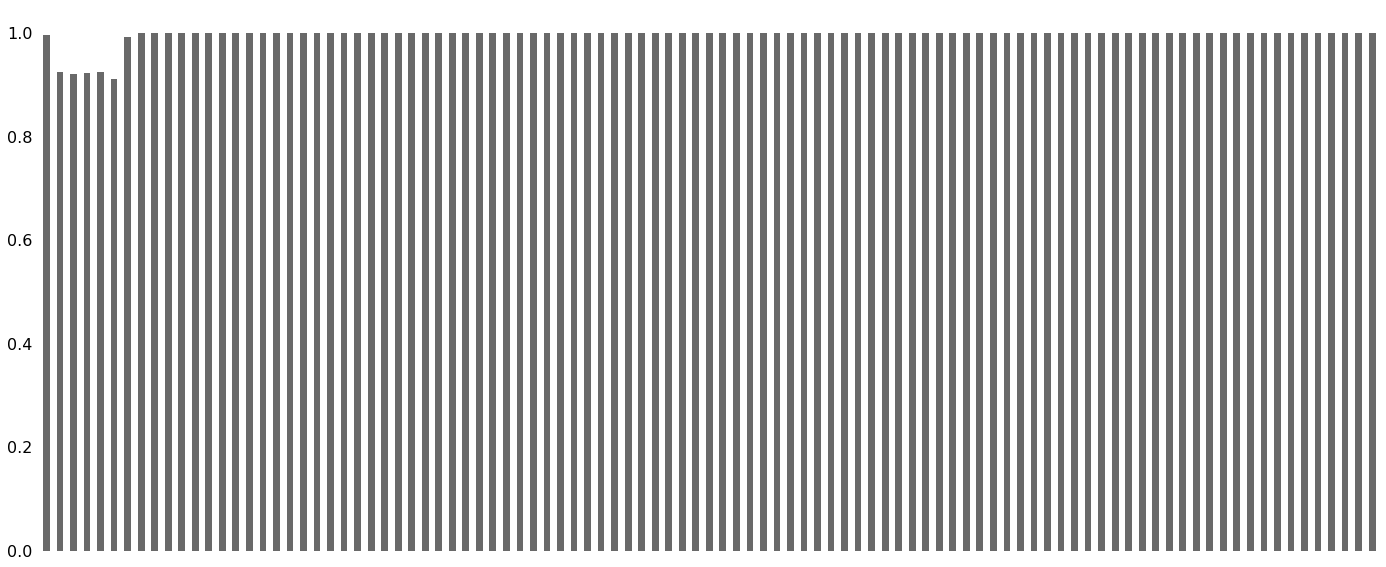

In [278]:
msno.bar(df)

In [279]:
df.isnull().sum()

childrens_fact              2
important_cash             40
important_rest             42
important_children         41
important_educ             40
                           ..
комната                     0
общежитие                   0
religion_да                 0
religion_нет                0
religion_трудно сказать     0
Length: 99, dtype: int64

In [280]:
#все пустые удаляем из набора
df = df.dropna()

In [281]:
df.isnull().sum()

childrens_fact             0
important_cash             0
important_rest             0
important_children         0
important_educ             0
                          ..
комната                    0
общежитие                  0
religion_да                0
religion_нет               0
religion_трудно сказать    0
Length: 99, dtype: int64

In [104]:
len(df)

477

In [105]:
len(df[~df['target'].isnull()])

477

In [106]:
df = df[~df['target'].isnull()]

In [107]:
#вычисление target label (выходных меток для обучения)
#61 класс
labels = np.array(df['target'] == 'да')

In [182]:
data = df.drop('target', axis=1)

In [189]:
x_train, x_val = train_test_split(
    data, train_size=0.7, random_state=27, shuffle=True
)
y_train, y_val = train_test_split(
    labels, train_size=0.7, random_state=27, shuffle=True
)

Конструирование нейронной сети

In [137]:
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (477, 98)
Shape of label tensor: (477,)


In [225]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
from sklearn.metrics import roc_auc_score, roc_curve

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(98,)))
#model.add(Flatten())
#model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                1584      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 17        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [226]:
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy',
             metrics=['acc'])

In [227]:
history = model.fit(x_train, y_train,
                    epochs=14,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/14
11/11 [==============================] - 1s 24ms/step - loss: 0.7047 - acc: 0.5146 - val_loss: 0.6574 - val_acc: 0.6597
Epoch 2/14
11/11 [==============================] - 0s 6ms/step - loss: 0.6574 - acc: 0.6306 - val_loss: 0.6218 - val_acc: 0.7222
Epoch 3/14
11/11 [==============================] - 0s 5ms/step - loss: 0.6345 - acc: 0.6745 - val_loss: 0.6013 - val_acc: 0.7222
Epoch 4/14
11/11 [==============================] - 0s 5ms/step - loss: 0.5957 - acc: 0.7056 - val_loss: 0.5854 - val_acc: 0.7292
Epoch 5/14
11/11 [==============================] - 0s 6ms/step - loss: 0.5854 - acc: 0.6981 - val_loss: 0.5748 - val_acc: 0.7292
Epoch 6/14
11/11 [==============================] - 0s 5ms/step - loss: 0.5712 - acc: 0.7109 - val_loss: 0.5652 - val_acc: 0.7292
Epoch 7/14
11/11 [==============================] - 0s 6ms/step - loss: 0.5623 - acc: 0.7129 - val_loss: 0.5579 - val_acc: 0.7361
Epoch 8/14
11/11 [==============================] - 0s 5ms/step - loss: 0.5606 - acc: 0.6

In [229]:
import matplotlib.pyplot as plt 

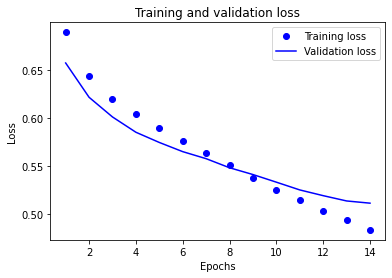

In [230]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

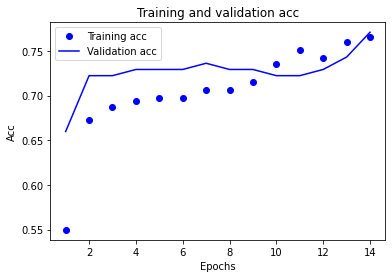

In [231]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

Вывод: Получившаяся точность модели (accuracy) - 0.77. Это высокая точность.  

In [232]:
y_hat = model.predict_proba(x_val)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [233]:
y_hat.shape

(144, 1)

In [234]:
y_val.shape

(144,)

Вычислим ROC AUC

In [237]:
y_hat[:10]

array([[0.5830783 ],
       [0.1526758 ],
       [0.14251862],
       [0.18073042],
       [0.4939723 ],
       [0.36556605],
       [0.1650378 ],
       [0.21297115],
       [0.26175448],
       [0.2117626 ]], dtype=float32)

In [236]:
pct_auc = roc_auc_score(y_val, y_hat)*100
print("ROC AUC: ", pct_auc)

ROC AUC:  78.16849816849818


Вывод: получился хороший результат 78%, в случае случайного классификатора площадь под кривой AUC была бы 50%.  